In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

import os

In [2]:
pd.options.display.float_format = '{:20,.2f}'.format

In [3]:
#steam_data = pd.read_csv('../data/steam_clean.csv', parse_dates=['release_date'], index_col=0)
steam_data2 = pd.read_csv('../data/steam_clean2.csv', parse_dates=['release_date'], index_col=0)

In [4]:
steam_data2.shape

(26356, 43)

In [5]:
steam_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26356 entries, 0 to 27074
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   appid             26356 non-null  int64         
 1   name              26356 non-null  object        
 2   release_date      26356 non-null  datetime64[ns]
 3   yrs_released      26356 non-null  int64         
 4   winter            26356 non-null  int64         
 5   spring            26356 non-null  int64         
 6   summer            26356 non-null  int64         
 7   fall              26356 non-null  int64         
 8   achievements      26356 non-null  int64         
 9   average_playtime  26356 non-null  int64         
 10  median_playtime   26356 non-null  int64         
 11  price             26356 non-null  float64       
 12  avg_owners        26356 non-null  float64       
 13  revenue           26356 non-null  float64       
 14  total_ratings     2635

In [6]:
steam_data2.head()

,appid,name,release_date,yrs_released,winter,spring,summer,fall,achievements,average_playtime,...,atmospheric,vr,difficult,story_rich,free_to_play,anime,horror,platformer,pixel_graphics,violent
0,10,Counter-Strike,2000-11-01,19,0,0,0,1,0,17612,...,0,0,0,0,0,0,0,0,0,1
1,20,Team Fortress Classic,1999-04-01,20,0,1,0,0,0,277,...,0,0,0,0,0,0,0,0,0,1
2,30,Day of Defeat,2003-05-01,16,0,1,0,0,0,187,...,0,0,0,0,0,0,0,0,0,0
3,40,Deathmatch Classic,2001-06-01,18,0,0,1,0,0,258,...,0,0,0,0,0,0,0,0,0,0
4,50,Half-Life: Opposing Force,1999-11-01,20,0,0,0,1,0,624,...,1,0,0,1,0,0,0,0,0,0


# 1. Explore target features

### a. Revenue

In [7]:
steam_data2['revenue'].describe()

count              26,356.00
mean            1,171,076.68
std            14,893,607.84
min                     0.00
25%                20,900.00
50%                57,900.00
75%               149,900.00
max         2,024,250,000.00
Name: revenue, dtype: float64

Separate free games and paid games for this exploratory analysis

In [8]:
steam_data2['free_to_play'].value_counts()
# Most games are not F2P

0    24515
1     1841
Name: free_to_play, dtype: int64

In [9]:
paid_games = steam_data2.loc[steam_data2['free_to_play']==0]
free_games = steam_data2.loc[steam_data2['free_to_play']==1]

In [10]:
free_games[['price', 'revenue']].describe()

,price,revenue
count,"1,841.00","1,841.00"
mean,0.00,0.00
std,0.00,0.00
min,0.00,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,0.00,0.00
max,0.00,0.00


Good. After some data cleaning, we don't see any paid games mistakenly in the F2P tag

In [11]:
paid_games[['price', 'revenue']].describe()

,price,revenue
count,"24,515.00","24,515.00"
mean,6.71,"1,259,020.88"
std,8.01,"15,439,153.55"
min,0.32,"7,200.00"
25%,2.09,"28,900.00"
50%,4.79,"69,650.00"
75%,7.49,"156,750.00"
max,421.99,"2,024,250,000.00"


In [12]:
paid_games['rpg'].value_counts()

0    20342
1     4173
Name: rpg, dtype: int64

In [13]:
paid_games['story_rich'].value_counts()

0    22558
1     1957
Name: story_rich, dtype: int64

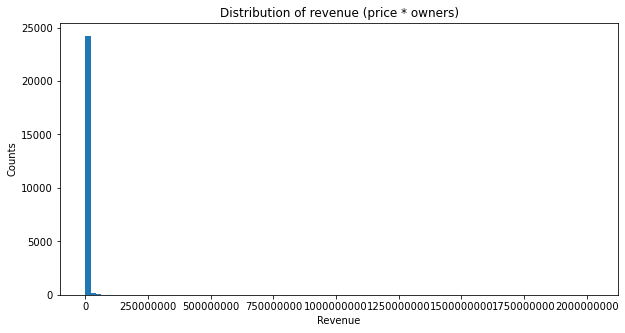

In [14]:
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(paid_games['revenue'], bins=100);
ax.set_title('Distribution of revenue (price * owners)');
ax.set_xlabel('Revenue');
ax.set_ylabel('Counts');
ax.ticklabel_format(useOffset=False, style='plain');

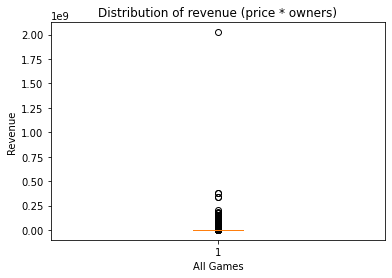

In [15]:
plt.boxplot(paid_games['revenue']);
plt.title('Distribution of revenue (price * owners)');
plt.xlabel('All Games');
plt.ylabel('Revenue');

Revenue seems to skew towards the lower end. Additionally, there seems to be one extreme outlier.

In [16]:
steam_data2[['appid', 'name', 'price','avg_owners','revenue']].sort_values('revenue',ascending=False).head(10)

,appid,name,price,avg_owners,revenue
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,26.99,"75,000,000.00","2,024,250,000.00"
12965,582010,MONSTER HUNTER: WORLD,49.99,"7,500,000.00","374,925,000.00"
2478,271590,Grand Theft Auto V,24.99,"15,000,000.00","374,850,000.00"
22458,863550,HITMAN™ 2,44.99,"7,500,000.00","337,425,000.00"
4712,346110,ARK: Survival Evolved,44.99,"7,500,000.00","337,425,000.00"
2016,252490,Rust,27.79,"7,500,000.00","208,425,000.00"
2964,292030,The Witcher® 3: Wild Hunt,24.99,"7,500,000.00","187,425,000.00"
2878,289070,Sid Meier’s Civilization® VI,49.99,"3,500,000.00","174,965,000.00"
20828,814380,Sekiro™: Shadows Die Twice,49.90,"3,500,000.00","174,650,000.00"
2087,255710,Cities: Skylines,22.99,"7,500,000.00","172,425,000.00"


It seems one game has a calculated revenue significantly higher than the other games

In [17]:
# Remove outlier to see how revenue distribution changes
no_outlier = paid_games.drop(12836, axis=0)

In [18]:
no_outlier['revenue'].describe()

count              24,514.00
mean            1,176,496.98
std             8,450,943.88
min                 7,200.00
25%                28,900.00
50%                69,650.00
75%               156,750.00
max           374,925,000.00
Name: revenue, dtype: float64

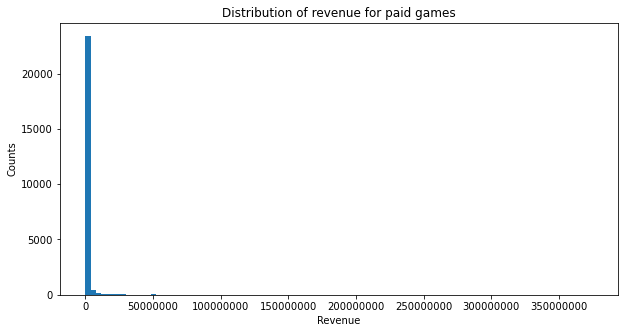

In [19]:
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(no_outlier['revenue'], bins=100);
ax.set_title('Distribution of revenue for paid games');
ax.set_xlabel('Revenue');
ax.set_ylabel('Counts');
ax.ticklabel_format(useOffset=False, style='plain');

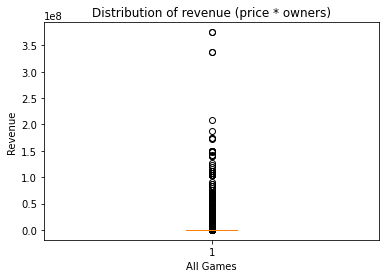

In [20]:
plt.boxplot(no_outlier['revenue']);
plt.title('Distribution of revenue (price * owners)');
plt.xlabel('All Games');
plt.ylabel('Revenue');

A little better, but still very skewed

### b. Number of Purchases (Avg Owners)

In [21]:
paid_games['avg_owners'].describe()

count              24,515.00
mean              101,901.28
std               709,679.30
min                10,000.00
25%                10,000.00
50%                10,000.00
75%                35,000.00
max            75,000,000.00
Name: avg_owners, dtype: float64

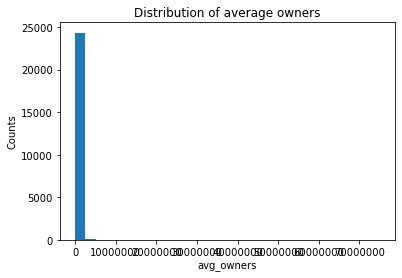

In [22]:
fig, ax = plt.subplots()

ax.hist(paid_games['avg_owners'], bins=30);
ax.set_title('Distribution of average owners');
ax.set_xlabel('avg_owners');
ax.set_ylabel('Counts');
ax.ticklabel_format(useOffset=False, style='plain');

In [23]:
paid_games[['appid', 'name', 'price','avg_owners','revenue']].sort_values('avg_owners',ascending=False).head(10)

,appid,name,price,avg_owners,revenue
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,26.99,"75,000,000.00","2,024,250,000.00"
0,10,Counter-Strike,7.19,"15,000,000.00","107,850,000.00"
10,240,Counter-Strike: Source,7.19,"15,000,000.00","107,850,000.00"
1025,72850,The Elder Scrolls V: Skyrim,9.99,"15,000,000.00","149,850,000.00"
1467,218620,PAYDAY 2,7.49,"15,000,000.00","112,350,000.00"
121,4000,Garry's Mod,6.99,"15,000,000.00","104,850,000.00"
23,620,Portal 2,7.19,"15,000,000.00","107,850,000.00"
21,550,Left 4 Dead 2,7.19,"15,000,000.00","107,850,000.00"
13,320,Half-Life 2: Deathmatch,3.99,"15,000,000.00","59,850,000.00"
17,400,Portal,7.19,"15,000,000.00","107,850,000.00"


This outlier was already removed in no_outlier

### c. Price

In [24]:
paid_games['price'].describe()

count              24,515.00
mean                    6.71
std                     8.01
min                     0.32
25%                     2.09
50%                     4.79
75%                     7.49
max                   421.99
Name: price, dtype: float64

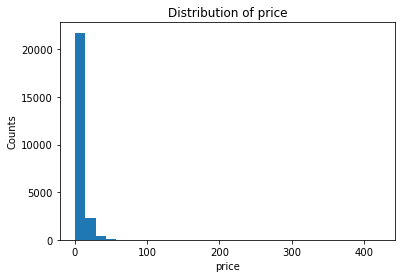

In [25]:
fig, ax = plt.subplots()

ax.hist(paid_games['price'], bins=30);
ax.set_title('Distribution of price');
ax.set_xlabel('price');
ax.set_ylabel('Counts');
ax.ticklabel_format(useOffset=False, style='plain');

In [26]:
paid_games[['appid', 'name', 'price','avg_owners','revenue']].sort_values('price',ascending=False).head(20)

,appid,name,price,avg_owners,revenue
21105,821800,ADR-Labelling Game,421.99,"10,000.00","4,219,900.00"
13062,585610,GameMaker Studio 2 UWP,303.99,"10,000.00","3,039,900.00"
10034,502570,Houdini Indie,209.99,"10,000.00","2,099,900.00"
14917,648070,CrisisActionVR,154.99,"10,000.00","1,549,900.00"
7992,438450,3DF Zephyr Lite Steam Edition,154.99,"10,000.00","1,549,900.00"
10910,526310,Silhouette,154.99,"10,000.00","1,549,900.00"
10624,517500,Tactics: Bludgeons Blessing,154.99,"10,000.00","1,549,900.00"
17126,707770,Tactics 2: War,154.99,"10,000.00","1,549,900.00"
25568,977200,Bible Test,154.99,"10,000.00","1,549,900.00"
13063,585620,GameMaker Studio 2 Mobile,154.99,"10,000.00","1,549,900.00"


Although the distribution of price is skewed, there aren't any noticable outliers.

### d. Perc Pos Ratings

In [27]:
steam_data2['perc_pos_ratings'].describe()

count              26,356.00
mean                    0.71
std                     0.23
min                     0.00
25%                     0.58
50%                     0.76
75%                     0.89
max                     1.00
Name: perc_pos_ratings, dtype: float64

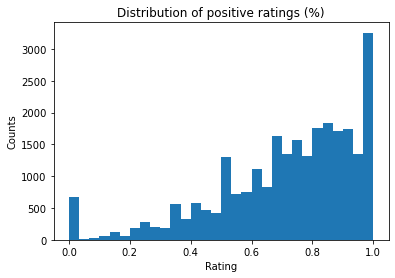

In [28]:
fig, ax = plt.subplots()

ax.hist(steam_data2['perc_pos_ratings'], bins=30);
ax.set_title('Distribution of positive ratings (%)');
ax.set_xlabel('Rating');
ax.set_ylabel('Counts');
ax.ticklabel_format(useOffset=False, style='plain');

Most games seem to lean towards the higher end of positive ratings, though there seems to be a small peak of very negatively received games.

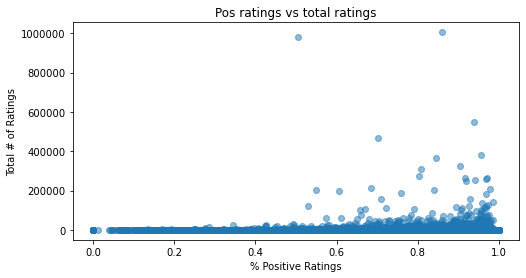

In [29]:
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(steam_data2['perc_pos_ratings'], steam_data2['total_ratings'], alpha=0.5);
ax.set_title('Pos ratings vs total ratings');
ax.set_xlabel('% Positive Ratings');
ax.set_ylabel('Total # of Ratings');
ax.ticklabel_format(useOffset=False, style='plain');

There seems to be some correlation between the total number of reviews a game has, and the percentage of those reviews that are positive.

### c. Relationship between revenue and positive reiviews

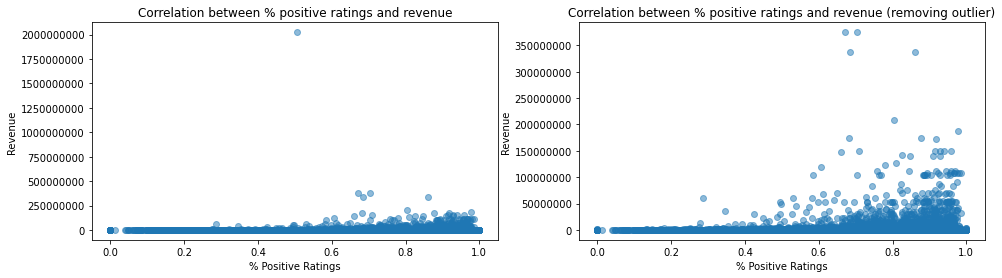

In [30]:
fig, ax = plt.subplots(1,2, figsize=(16,4), sharey=False)

# View correlation of revenue with % positive ratings
ax[0].scatter(steam_data2['perc_pos_ratings'], steam_data2['revenue'], alpha=0.5);
ax[0].set_title('Correlation between % positive ratings and revenue');
ax[0].set_xlabel('% Positive Ratings');
ax[0].set_ylabel('Revenue');
ax[0].ticklabel_format(useOffset=False, style='plain');

# Same thing, but removing outlier
ax[1].scatter(no_outlier['perc_pos_ratings'], no_outlier['revenue'], alpha=0.5);
ax[1].set_title('Correlation between % positive ratings and revenue (removing outlier)');
ax[1].set_xlabel('% Positive Ratings');
ax[1].set_ylabel('Revenue');
ax[1].ticklabel_format(useOffset=False, style='plain');

There is a trend between the two target features as well.

# 2. Explore Categorical Features

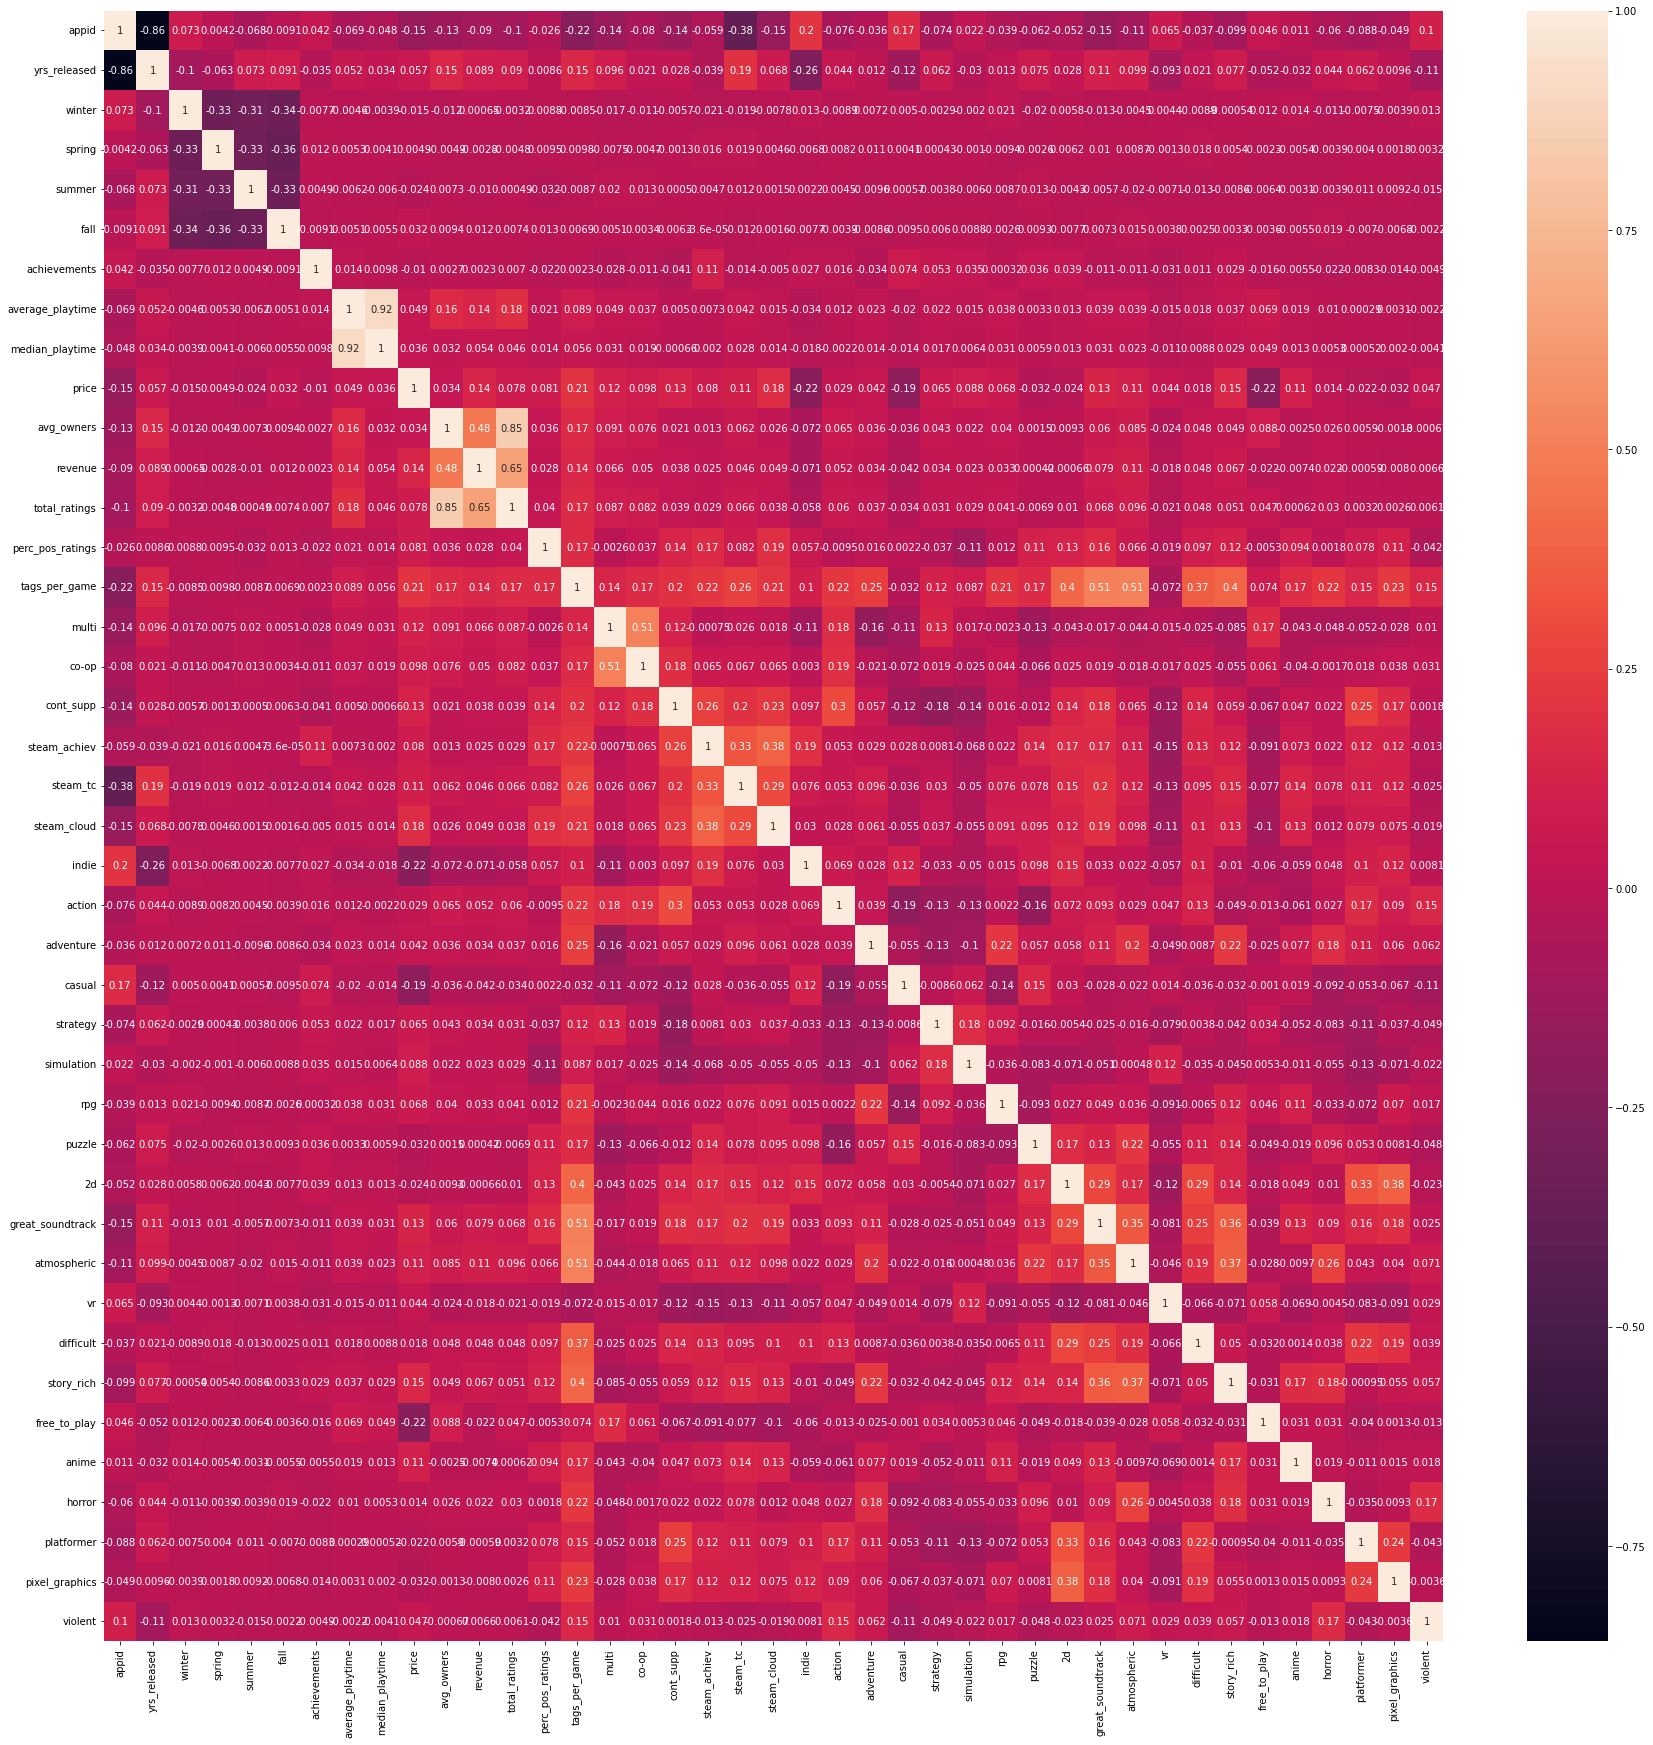

In [31]:
# Make a heatmap
plt.figure(figsize=(30,30))
_ = sns.heatmap(steam_data2.corr(), annot=True)

In [32]:
def group_bar(columns, pred, target, figsize=(12,6)):
    """Functions that takes in binary columns and produces a bar graph
    comparing each value (1 or 0) with a target feature"""
    labels = columns
    means_1 = []
    means_0 = []
    
    for col in columns:
        means = no_outlier.groupby(col)[target].mean()
        means_1.append(means[1])
        means_0.append(means[0])
    
    x = np.arange(len(labels))
    width = 0.35
    
    # Plot the graph
    fig, ax = plt.subplots(figsize=figsize) 
    cols_1 = ax.bar(x - width/2, means_1, width, label="1")
    cols_0 = ax.bar(x + width/2, means_0, width, label="0")
    
    ax.set_title("Average {target} by {pred}".format(target=target, pred=pred))
    ax.set_xlabel("{pred}".format(pred=pred))
    ax.set_ylabel("{target}".format(target=target))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    plt.xticks(rotation=45)

    #ax.ticklabel_format(useOffset=False, style='plain')
    #ax.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
    ax.legend()
    
    # Probably remove:
    #ax.bar_label(cols_1, padding=3)
    #ax.bar_label(cols_0, padding=3)

    #fig.tight_layout()
    plt.show()

### a. Genres

In [33]:
genres = ['indie', 'action', 'adventure', 'casual', 'strategy', 'simulation', 'rpg', 'puzzle', '2d', 'great_soundtrack',
          'atmospheric', 'difficult', 'story_rich', 'anime', 'horror', 'platformer', 'pixel_graphics', 'violent']

In [56]:
for i in genres:
    print(paid_games[i].value_counts())

1    18650
0     5865
Name: indie, dtype: int64
0    12911
1    11604
Name: action, dtype: int64
0    14185
1    10330
Name: adventure, dtype: int64
0    14347
1    10168
Name: casual, dtype: int64
0    19300
1     5215
Name: strategy, dtype: int64
0    19355
1     5160
Name: simulation, dtype: int64
0    20342
1     4173
Name: rpg, dtype: int64
0    21447
1     3068
Name: puzzle, dtype: int64
0    21517
1     2998
Name: 2d, dtype: int64
0    21540
1     2975
Name: great_soundtrack, dtype: int64
0    21819
1     2696
Name: atmospheric, dtype: int64
0    22487
1     2028
Name: difficult, dtype: int64
0    22558
1     1957
Name: story_rich, dtype: int64
0    22737
1     1778
Name: anime, dtype: int64
0    22772
1     1743
Name: horror, dtype: int64
0    22650
1     1865
Name: platformer, dtype: int64
0    22724
1     1791
Name: pixel_graphics, dtype: int64
0    22862
1     1653
Name: violent, dtype: int64


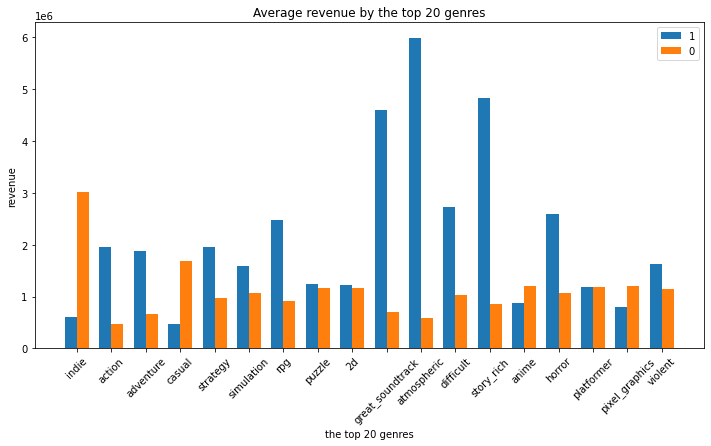

In [34]:
group_bar(genres, 'the top 20 genres', 'revenue')

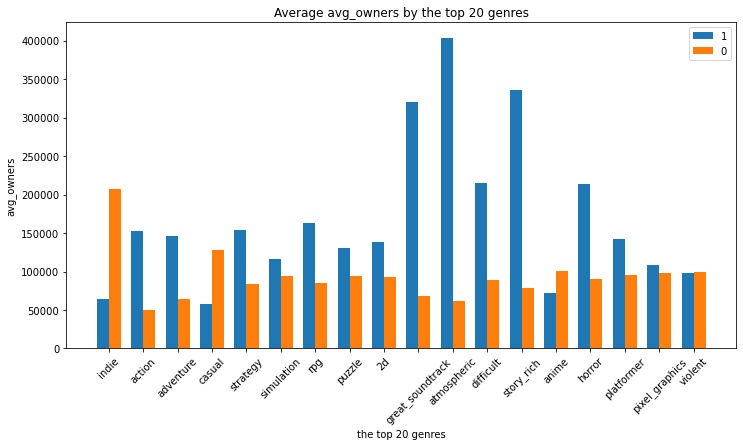

In [35]:
group_bar(genres, 'the top 20 genres', 'avg_owners')

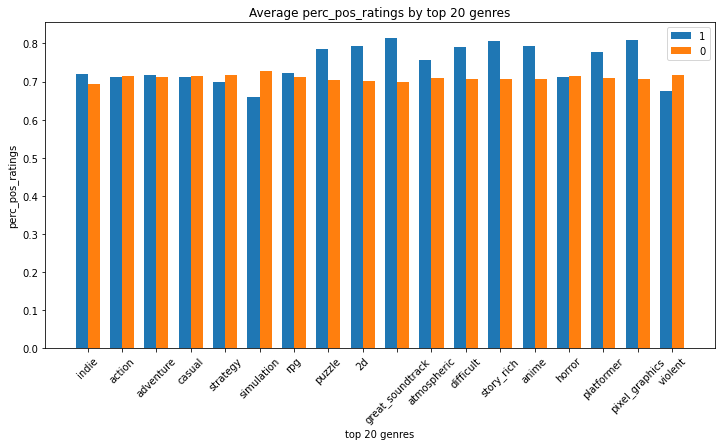

In [36]:
group_bar(genres, 'top 20 genres', 'perc_pos_ratings')

Genre seems to have more of an impact on number of purchases and revenue, but less so on positive ratings.

### b. Season

In [37]:
seasons = ['winter', 'spring', 'summer', 'fall']

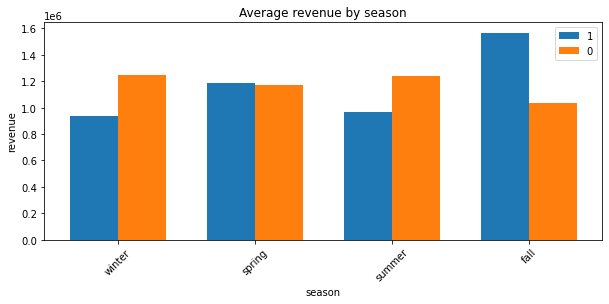

In [38]:
group_bar(seasons, 'season', 'revenue', figsize=(10,4))

Games that were released in the fall have the highest revenue.

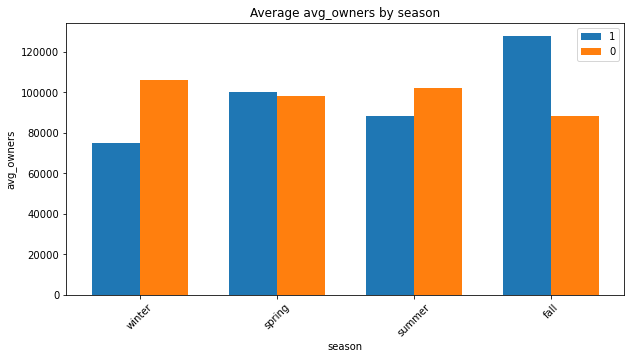

In [39]:
group_bar(seasons, 'season', 'avg_owners', figsize=(10,5))

More people seem to buy games that were released in summer and fall than winter or spring.

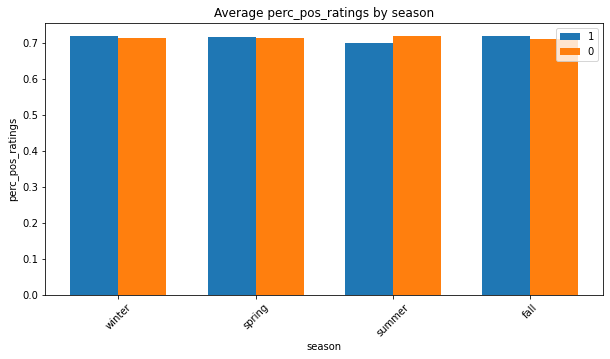

In [40]:
group_bar(seasons, 'season', 'perc_pos_ratings', figsize=(10,5))

The season of release doesn't seem to affect ratings.

### c. Game Categories

In [47]:
# Adding in VR and F2P
categories = ['multi', 'co-op', 'cont_supp', 'steam_achiev', 'steam_tc', 'steam_cloud', 'vr']

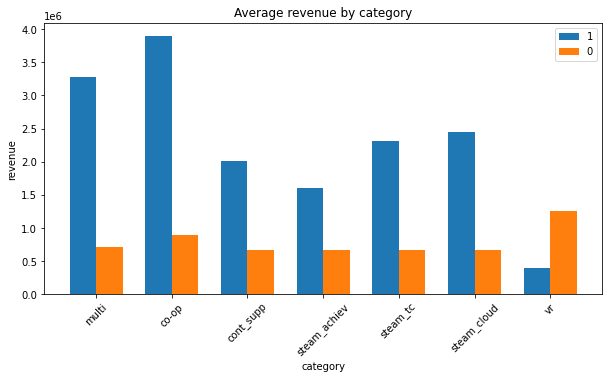

In [48]:
group_bar(columns=categories, pred='category', target='revenue', figsize=(10,5))

In [55]:
for i in categories:
    print(paid_games[i].value_counts())

0    20094
1     4421
Name: multi, dtype: int64
0    22272
1     2243
Name: co-op, dtype: int64
0    15277
1     9238
Name: cont_supp, dtype: int64
1    13270
0    11245
Name: steam_achiev, dtype: int64
0    16975
1     7540
Name: steam_tc, dtype: int64
0    17568
1     6947
Name: steam_cloud, dtype: int64
0    22269
1     2246
Name: vr, dtype: int64


Other than VR (and obviously F2P), these features are associated with a higher revenue.

In [ ]:
group_bar(categories, 'avg_owners')

In [ ]:
group_bar(categories, 'perc_pos_ratings')

In [ ]:
group_bar(categories, 'price')

# 3. Explore Numerical Features

In [ ]:
steam_data2.columns

In [ ]:
numerical = ['yrs_released', 'achievements', 'average_playtime', 'median_playtime', 'price', 'avg_owners',
             'total_ratings', 'perc_pos_ratings', 'tags_per_game']

In [ ]:
def plot_nums(columns, target, data, nrows, ncols, figsize=(10,10)):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x=col, y=target, data=data, alpha=0.5)
        ax.set(xlabel=col, ylabel=target)

In [ ]:
# Plot each numerical feature against revenue
plot_nums(numerical, 'revenue', steam_data2, 3,3)

In [ ]:
# Plot each numerical feature against revenue (without outlier)
plot_nums(numerical, 'revenue', no_outlier, 3,3)

In [ ]:
plot_nums(numerical, 'avg_owners', steam_data2, 3,3)

In [ ]:
plot_nums(numerical, 'perc_pos_ratings', steam_data2, 3,3)

Overall, percentage of positive ratings doesn't seem like a useful metric.

In [ ]:
steam_data2.shape

In [ ]:
steam_data3 = steam_data2.drop(12836, axis=0)
steam_data3.shape

In [ ]:
# Save dataset without outlier
steam_data3.to_csv('../data/steam_clean3.csv')